# Week 1 — Signals as Physical Quantities & First-Order Dynamics

## Learning Objectives

By the end of this week, you should be able to:

1. Use an oscilloscope to measure voltage signals correctly.
2. Interpret voltage as a time-dependent physical quantity.
3. Derive and solve the RC charging equation.
4. Predict and measure the time constant τ.
5. Design an RC circuit for a desired response time.

## 1. What Is a Signal?

In electronics, a signal is typically a voltage or current that varies with time.

Examples:
- Microphone → voltage signal
- Temperature sensor → voltage signal
- Function generator → voltage signal

Throughout this course, we will study how circuits:
- Modify signals
- Amplify signals
- Filter signals
- Switch signals

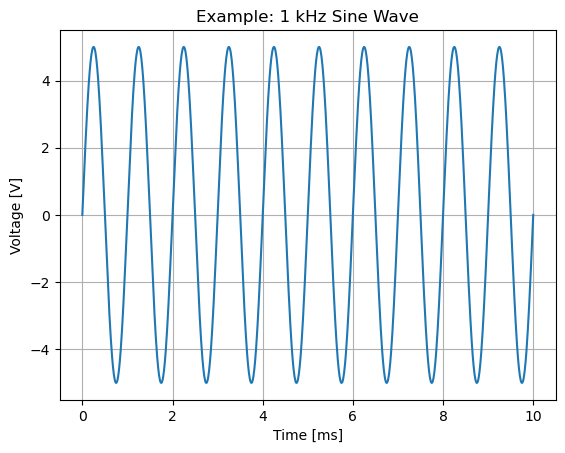

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 0.01, 1000)  # 10 ms
f = 1000  # 1 kHz
V0 = 5

sine = V0 * np.sin(2*np.pi*f*t)

plt.figure()
plt.plot(t*1000, sine)
plt.xlabel("Time [ms]")
plt.ylabel("Voltage [V]")
plt.title("Example: 1 kHz Sine Wave")
plt.grid(True)
plt.show()

## 2. Oscilloscope Fundamentals

An oscilloscope displays voltage as a function of time.

Key controls:
- Vertical scale (V/div)
- Time base (s/div)
- Trigger
- Probe attenuation (1x / 10x)

Important:
Incorrect grounding can damage equipment.
Always verify connections.

## 3. The RC Circuit

Consider the following circuit:

Vin → R → C → Ground

We measure the capacitor voltage Vc(t).

Using KCL the current through the resistor is:

$$I = \frac{(V_{in} - V_c)}{R}$$

The current into the capacitor is:

$$I = C \frac{dV_c}{dt} $$

Equating:

$$ C \frac{dV_c}{dt} = \frac{(V_{in} - V_c)}{R} $$

Rearranging:

$$ \frac{dV_c}{dt} + \frac{1}{RC} Vc = \frac{1}{RC} Vin $$

For a step input Vin = V0:

$$V_c(t) = V0 (1 - e^{-t/RC})$$

Define the time constant: $\tau = RC$
* After $1\tau \to 63\%$
* After $3\tau \to 95\%$
* After $5\tau \to 99\%$




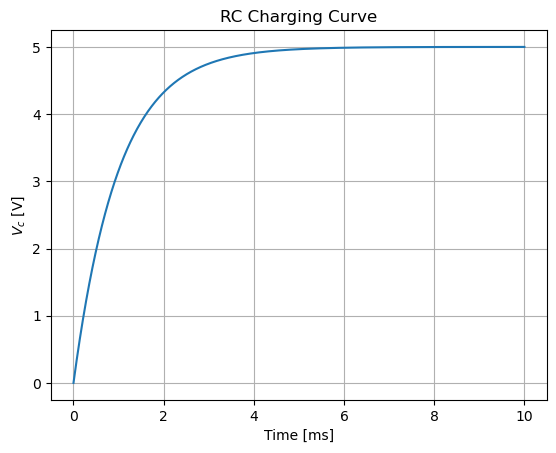

In [2]:
R = 1000      # 1 kΩ
C = 1e-6      # 1 µF
tau = R*C

t = np.linspace(0, 10*tau, 1000)
V0 = 5

Vc = V0*(1 - np.exp(-t/tau))

plt.figure()
plt.plot(t*1000, Vc)
plt.xlabel("Time [ms]")
plt.ylabel(r"$V_c$ [V]")
plt.title("RC Charging Curve")
plt.grid(True)
plt.show()

## 4. Physical Interpretation

- R controls how fast charge flows.
- C controls how much charge is stored.
- The product RC defines system speed.

This is our first example of a dynamic system.

## 5. Design Example

Problem:
Design a RC circuit that reaches 90% of its final value in 2 ms.

Step 1: 90% corresponds to: $0.9 = 1 - e^{-t/\tau}$ Solve for $\tau$.

Step 2: Choose practical R and C values.


In [3]:
import sympy as sp

tau = sp.symbols('tau', positive=True)
t_value = 2e-3

eq = sp.Eq(0.9, 1 - sp.exp(-t_value/tau))
tau_solution = sp.solve(eq, tau)[0]

print(f'solution is {1e3*tau_solution:.3f} ms')

solution is 0.869 ms


## Week 1 Summary

- A signal is a measurable physical voltage.
- The oscilloscope allows direct observation of signals.
- The RC circuit is a first-order system.
- The time constant τ = RC defines system speed.
- We can design circuits to achieve desired timing behavior.